# Creadit risk prediction
## Goal: make a model to predict a loan default probability

# Import and download data section

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
raw_data = np.genfromtxt('datasets/credit_risk_dataset.csv', delimiter=',', dtype=None, names=True, encoding='utf-8')

# Look at the data

In [4]:
raw_data

array([(21,   9600, 'OWN', 5., 'EDUCATION', 'B',  1000, 11.14, 0, 0.1 , 'N',  2),
       (25,   9600, 'MORTGAGE', 1., 'MEDICAL', 'C',  5500, 12.87, 1, 0.57, 'N',  3),
       (23,  65500, 'RENT', 4., 'MEDICAL', 'C', 35000, 15.23, 1, 0.53, 'N',  2),
       ...,
       (65,  76000, 'RENT', 3., 'HOMEIMPROVEMENT', 'B', 35000, 10.99, 1, 0.46, 'N', 28),
       (56, 150000, 'MORTGAGE', 5., 'PERSONAL', 'B', 15000, 11.48, 0, 0.1 , 'N', 26),
       (66,  42000, 'RENT', 2., 'MEDICAL', 'B',  6475,  9.99, 0, 0.15, 'N', 30)],
      dtype=[('person_age', '<i4'), ('person_income', '<i4'), ('person_home_ownership', '<U8'), ('person_emp_length', '<f8'), ('loan_intent', '<U17'), ('loan_grade', '<U1'), ('loan_amnt', '<i4'), ('loan_int_rate', '<f8'), ('loan_status', '<i4'), ('loan_percent_income', '<f8'), ('cb_person_default_on_file', '<U1'), ('cb_person_cred_hist_length', '<i4')])

In [5]:
age = raw_data['person_age']
income = raw_data['person_income']
empl_length = raw_data['person_emp_length']
loan_grade = raw_data['loan_grade']
loan_status = raw_data['loan_status']
cred_hist_length = raw_data['cb_person_cred_hist_length']
loan_amnt = raw_data['loan_amnt']

m = loan_status.shape[0]

In [6]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=1)
    ax.legend(loc=loc)

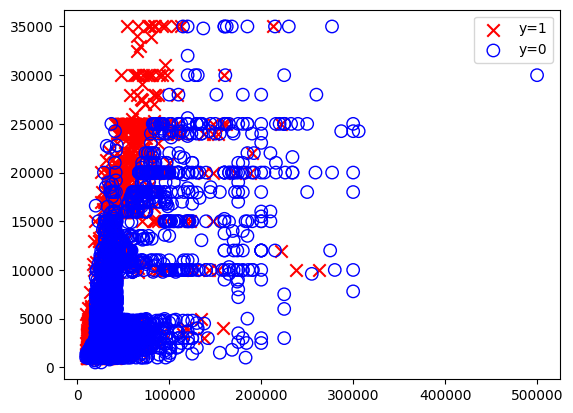

In [7]:
x = np.c_[income, loan_amnt]
plot_data(x[:5000], loan_status[:5000], plt)

# SkLearn based Logistic regression

Let's take only income and loan amount

## 1. Normalize

In [8]:
x_train = np.c_[income, loan_amnt]
y_train = loan_status

In [9]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)

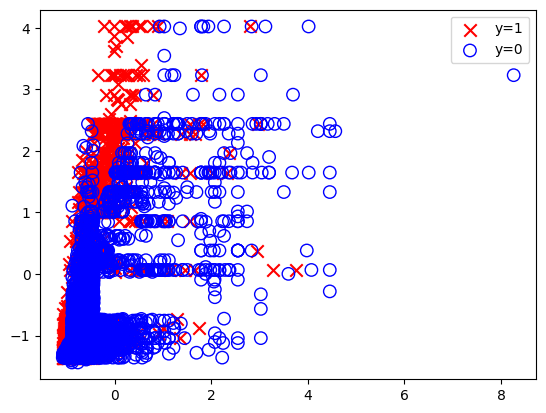

In [10]:
plot_data(x_train_norm[:5000], y_train[:5000], plt)

# 2. Train

In [114]:
lr_model = LogisticRegression()
lr_model.fit(x_train_norm, y_train)

LogisticRegression()

In [12]:
x_test = np.array([x_train[0]])
x_test_norm = scaler.transform(x_test)

lr_model.predict(x_test_norm)

array([0])

In [13]:
y_train[0]

0

In [113]:
help(lr_model)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be converted
 |  (and copied).
 |
 |  The 'newton-cg', 'sag', and 'lbfgs' solvers suppor

# 3. Tests

In [14]:
lr_model.score(x_train_norm, y_train)

0.7934612432847276

In [21]:
lr_model.coef_, lr_model.intercept_

(array([[-1.77654141,  0.71808755]]), array([-1.63433426]))

In [20]:
correct = 0
for i in range(m):
    predict = lr_model.predict([x_train_norm[i]])
    if predict >= 0.5:
        # print(predict)
        correct += 1

print(correct / m)

0.032509593246354565


# 4. Graph

In [44]:
y_mask_default = y_train != 0
y_mask_no_default = (y_train == 0)

In [52]:
f'1: {len(x_train_norm[y_mask_default])}, 0: {len(x_train_norm[y_mask_no_default])}'

'1: 7107, 0: 25468'

In [54]:
x_train_norm_1 = x_train_norm[y_mask_default] # default - X
x_train_norm_0 = x_train_norm[y_mask_no_default] # no default - O

Boundary

In [84]:
def bound_line(x1, w1, w2, b):
    return (-1 * w1 * x1 - b) / w2

In [116]:
# Sklearn
w1 = lr_model.coef_[0][0]
w2 = lr_model.coef_[0][1]
b = lr_model.intercept_[0]

In [118]:
w1, w2, b

(-1.7765414121927878, 0.7180875502418079, -1.6343342562912317)

In [101]:
x_bound = np.array([-2, 1])
y_bound = np.array([bound_line(x_bound[0], w1, w2, b),
                    bound_line(x_bound[1], w1, w2, b)])

Plot

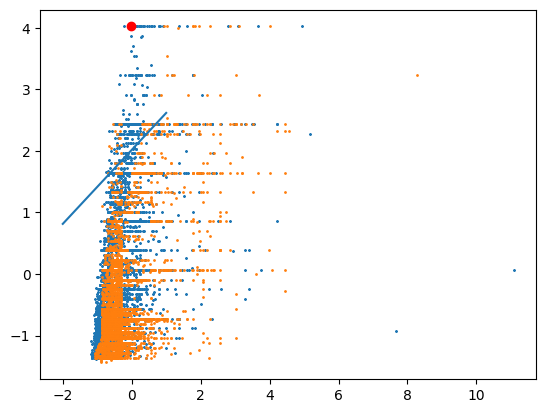

In [107]:
SHOW_CNT = 5000
plt.scatter(x_train_norm_1[:SHOW_CNT,0], x_train_norm_1[:SHOW_CNT,1], marker='X', s = 1)
plt.scatter(x_train_norm_0[:SHOW_CNT,0], x_train_norm_0[:SHOW_CNT,1], marker='o', s = 1)
plt.scatter([x_train_norm[2][0]], [x_train_norm[2][1]], c='r')
plt.plot(x_bound, y_bound)

Find smth >= 0.5

In [104]:
for i in range(m):
    if x_train_norm[i][1] >= 3:
        print(i)
        break

2


In [105]:
x_train_norm[2]

array([-0.00727806,  4.0206298 ])

In [108]:
y_train[2]

1

In [120]:
help(lr_model)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be converted
 |  (and copied).
 |
 |  The 'newton-cg', 'sag', and 'lbfgs' solvers suppor